# Example of using the Borehole3D class

## Imports

In [1]:
from striplog import Component, Decor, Legend, Lexicon, Striplog
from core.omf import Borehole3D, striplog_legend_to_omf_legend 
from utils.lexicon.lexicon_memoris import lexicon_memoris, lithology_memoris, pollutant_memoris
from utils.io import boreholes_from_files, gdf_viewer
from core.core import Project
from core.orm import BoreholeOrm, PositionOrm, Base, IntervalDataOrm
import random
from os import remove
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from definitions import ROOT_DIR

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/legend.py:687: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


## Reading of CSV files in a dir

In [2]:
#df = pd.read_csv('test_data_boreholes.csv', sep=',') # use english lexicon
df = pd.read_csv('test_litho_fr.csv', sep=',') # use french lexicon

## Data Checking

In [3]:
#pol = ['As', 'Ni', 'Cl', 'Hg', 'Pb', 'Zn']
pol = ['VR','VS','VI']
#df[['Pollutant', 'Concentration']] = ''
df[['Pollutant', 'Concentration']] = ''
df['Pollutant'] = df['Pollutant'].apply(lambda x: random.sample(pol, 1)[0])
df['Concentration'] = df['Concentration'].apply(lambda x: np.random.randint(0,100))
df['Unit'] = 'mg/l'

In [4]:
df['Lithology'] = df['Lithology'].replace({'Grès':'Marne', 'Calcaire':'Dolomie'})

In [5]:
df.loc[35.5, :] = ['BH007',152794.0, 121111.0, 60.0, 0.57, 45, 'Calcaire', 'Bleu', 4, 41, 45, 'Cl', 78, 'mg/l']
df.loc[25.5, :] = ['BH005',152473.0, 121460.0, 72.0, 0.61, 32, 'Schiste', 'gris', 3, 29, 32, 'Cl', 78, 'mg/l']
df.drop(index=4, inplace=True)
df.drop(columns='Colour', inplace=True)
df = df.sort_index().reset_index(drop=True)

In [6]:
gdf_viewer(df)

Rows : 996, columns : 13


interactive(children=(IntSlider(value=10, description='rows', max=996, min=10, readout=False), IntSlider(value…

## Create Boreholes from dataframes or files

In [7]:
bhs_df=[df[0:50]] # list of dataframes

In [8]:
boreholes, components, link_intv_comp = boreholes_from_files(bhs_df, verbose=False,
                                                litho_field=['Lithology', 'Pollutant'], 
                                                color_field='Colour', lexicon=lexicon_memoris, 
                                                diam_field='Diameter', thick_field='Thickness')

/home/su530201/PycharmProjects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Components.id to column Linkintervalcomponent.comp_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Components.id to Linkintervalcomponent.comp_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))
/home/su530201/PycharmProjects/GSDMA/utils/io.py:469: SAWarning: relationship 'ComponentOrm.intervals' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies I


Dataframe 0 processing...
|__ID:'BH001'
{'lithology': 'sable', 'pollutant': 'vs'}
{'lithology': 'argile', 'pollutant': 'vs'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vs'}
Summary : [Striplog(4 Intervals, start=0.0, stop=28.0)]
|__ID:'BH002'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vs'}
{'lithology': 'dolomie', 'pollutant': 'vr'}
Summary : [Striplog(5 Intervals, start=0.0, stop=37.0)]
|__ID:'BH003'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vr'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbon', 'pollutant': 'vi'}
{'lithology': 'dolomie', 'pollutant': 'vs'}
Summary : [Striplog(5 Intervals, start=0.0, stop=18.0)]
|__ID:'BH004'
{'lithology': 'sable', 'pollutant': 'vi'}
{'lithology': 'argile', 'pollutant': 'vi'}
{'lithology': 'marne', 'pollutant': 'vr'}
{'lithology': 'charbo

/home/su530201/PycharmProjects/GSDMA/utils/io.py:469: SAWarning: relationship 'LinkIntervalComponentOrm.interval' will copy column Intervals.id to column Linkintervalcomponent.int_id, which conflicts with relationship(s): 'IntervalOrm.components' (copies Intervals.id to Linkintervalcomponent.int_id), 'ComponentOrm.intervals' (copies Intervals.id to Linkintervalcomponent.int_id). If this is not the intention, consider if these relationships should be linked with back_populates, or if viewonly=True should be applied to one or more if they are read-only. For the less common case that foreign key constraints are partially overlapping, the orm.foreign() annotation can be used to isolate the columns that should be written towards.   The 'overlaps' parameter may be used to remove this warning.
  boreholes.append(BoreholeOrm(id=bh_name))


In [9]:
boreholes

[<core.orm.BoreholeOrm>(Name=BH001, Length=28.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=37.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=18.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=26.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=32.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=26.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=45.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=35.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=40.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=14.0, Diameter=0.31, Intervals=4)]

In [10]:
components

{0: Component({'lithology': 'marne', 'pollutant': 'vr'}),
 1: Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 2: Component({'lithology': 'sable', 'pollutant': 'vs'}),
 3: Component({'lithology': 'argile', 'pollutant': 'vs'}),
 4: Component({'lithology': 'dolomie', 'pollutant': 'vr'}),
 5: Component({'lithology': 'sable', 'pollutant': 'vi'}),
 6: Component({'lithology': 'argile', 'pollutant': 'vi'}),
 7: Component({'lithology': 'dolomie', 'pollutant': 'vs'}),
 8: Component({'lithology': 'charbon', 'pollutant': 'vi'}),
 9: Component({'lithology': 'argile', 'pollutant': 'vr'}),
 10: Component({'lithology': 'dolomie', 'pollutant': 'vi'}),
 11: Component({'lithology': 'charbon', 'pollutant': 'vr'}),
 12: Component({'lithology': 'marne', 'pollutant': 'vs'}),
 13: Component({'lithology': 'schiste'}),
 14: Component({'lithology': 'marne', 'pollutant': 'vi'}),
 15: Component({'lithology': 'calcaire'}),
 16: Component({'lithology': 'sable', 'pollutant': 'vr'})}

In [11]:
len(boreholes), len(components)

(10, 17)

## Create a project and save data in a database

In [12]:
remove('tmp_files/tfe_orm_db.db')

In [13]:
engine = create_engine('sqlite:///tmp_files/tfe_orm_db.db', echo=True)

In [14]:
Base.metadata.create_all(engine)

2021-07-01 19:33:09,300 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 19:33:09,301 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Boreholes")
2021-07-01 19:33:09,301 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 19:33:09,303 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Boreholes")
2021-07-01 19:33:09,303 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 19:33:09,304 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Positions")
2021-07-01 19:33:09,305 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 19:33:09,308 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Positions")
2021-07-01 19:33:09,309 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 19:33:09,311 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("IntervalData")
2021-07-01 19:33:09,312 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-07-01 19:33:09,313 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("IntervalData")
2021-07-01 19:33:09,313 INFO sqlalchemy.engine.E

In [15]:
Session = sessionmaker(bind=engine)
session = Session()

In [16]:
p = Project(session, legend_dict={'lithology':lithology_memoris, 'pollutant':pollutant_memoris}, 
            lexicon=lexicon_memoris, repr_attribute='lithology')

p.add_components(components)

2021-07-01 19:33:09,379 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 19:33:09,383 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 19:33:09,383 INFO sqlalchemy.engine.Engine [generated in 0.00103s] ()
2021-07-01 19:33:09,389 INFO sqlalchemy.engine.Engine INSERT INTO "Components" (id, description) VALUES (?, ?)
2021-07-01 19:33:09,389 INFO sqlalchemy.engine.Engine [generated in 0.00084s] ((0, 'Marne, vr'), (1, 'Charbon, vs'), (2, 'Sable, vs'), (3, 'Argile, vs'), (4, 'Dolomie, vr'), (5, 'Sable, vi'), (6, 'Argile, vi'), (7, 'Dolomie, vs')  ... displaying 10 of 17 total bound parameter sets ...  (15, 'Calcaire'), (16, 'Sable, vr'))
2021-07-01 19:33:09,392 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 19:33:09,396 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 19:33:09,397 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "B

Add boreholes into the project

In [17]:
for bh in boreholes:
    p.add_borehole(bh)

2021-07-01 19:33:09,408 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 19:33:09,411 INFO sqlalchemy.engine.Engine [generated in 0.00307s] ('BH001', 28.0, 0.43)
2021-07-01 19:33:09,415 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 19:33:09,416 INFO sqlalchemy.engine.Engine [generated in 0.00110s] ((0, 101.0, 101.0, 101.0, 152600.0, 121039.0), (1, 97.0, 97.0, 97.0, 152600.0, 121039.0), (2, 97.0, 97.0, 97.0, 152600.0, 121039.0), (3, 93.0, 93.0, 93.0, 152600.0, 121039.0), (4, 93.0, 93.0, 93.0, 152600.0, 121039.0), (5, 81.0, 81.0, 81.0, 152600.0, 121039.0), (6, 81.0, 81.0, 81.0, 152600.0, 121039.0), (7, 73.0, 73.0, 73.0, 152600.0, 121039.0))
2021-07-01 19:33:09,420 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, description, top_id, base_id, data_id) VALUES (?, ?, ?, ?, ?, ?, ?)
2021-07-01 19:33:09,421 INFO sqlalchemy.e

2021-07-01 19:33:09,571 INFO sqlalchemy.engine.Engine [cached since 0.1115s ago] (8,)
2021-07-01 19:33:09,573 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:09,574 INFO sqlalchemy.engine.Engine [cached since 0.1059s ago] (9,)
2021-07-01 19:33:09,578 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:09,579 INFO sqlalchemy.engine.Engine [cached since 0.1193s ago] (10,)
2021-07-01 19:33:09,581 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id"

2021-07-01 19:33:09,682 INFO sqlalchemy.engine.Engine [cached since 0.2224s ago] (22,)
2021-07-01 19:33:09,684 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:09,685 INFO sqlalchemy.engine.Engine [cached since 0.2169s ago] (23,)
2021-07-01 19:33:09,688 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:09,690 INFO sqlalchemy.engine.Engine [cached since 0.2301s ago] (24,)
2021-07-01 19:33:09,694 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_i

2021-07-01 19:33:09,790 INFO sqlalchemy.engine.Engine [cached since 0.3302s ago] (36,)
2021-07-01 19:33:09,795 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:09,796 INFO sqlalchemy.engine.Engine [cached since 0.3277s ago] (37,)
2021-07-01 19:33:09,815 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 19:33:09,816 INFO sqlalchemy.engine.Engine [cached since 0.2803s ago] (96.0, 'BH004')
2021-07-01 19:33:09,817 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 19:33:09,818 INFO sqlalchemy.engine.Engine [cached since 0.4098s ago] ('BH005', 32.0, 0.61)
2021-07-01 19:33:09,820 INFO sqlalchemy.engine.Engine INSERT INTO "Positi

2021-07-01 19:33:09,918 INFO sqlalchemy.engine.Engine INSERT INTO "Boreholes" (id, length, diameter) VALUES (?, ?, ?)
2021-07-01 19:33:09,918 INFO sqlalchemy.engine.Engine [cached since 0.5104s ago] ('BH006', 26.0, 0.31)
2021-07-01 19:33:09,920 INFO sqlalchemy.engine.Engine INSERT INTO "Positions" (id, upper, middle, lower, x, y) VALUES (?, ?, ?, ?, ?, ?)
2021-07-01 19:33:09,920 INFO sqlalchemy.engine.Engine [cached since 0.5054s ago] ((50, 101.0, 101.0, 101.0, 152375.0, 121002.0), (51, 100.0, 100.0, 100.0, 152375.0, 121002.0), (52, 100.0, 100.0, 100.0, 152375.0, 121002.0), (53, 98.0, 98.0, 98.0, 152375.0, 121002.0), (54, 98.0, 98.0, 98.0, 152375.0, 121002.0), (55, 92.0, 92.0, 92.0, 152375.0, 121002.0), (56, 92.0, 92.0, 92.0, 152375.0, 121002.0), (57, 86.0, 86.0, 86.0, 152375.0, 121002.0), (58, 86.0, 86.0, 86.0, 152375.0, 121002.0), (59, 75.0, 75.0, 75.0, 152375.0, 121002.0))
2021-07-01 19:33:09,924 INFO sqlalchemy.engine.Engine INSERT INTO "Intervals" (id, borehole, interval_number, d

2021-07-01 19:33:10,034 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 19:33:10,035 INFO sqlalchemy.engine.Engine [cached since 0.6521s ago] ()
2021-07-01 19:33:10,037 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-01 19:33:10,040 INFO sqlalchemy.engine.Engine [cached since 0.5913s ago] ('BH007',)
2021-07-01 19:33:10,046 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".low

2021-07-01 19:33:10,148 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:10,149 INFO sqlalchemy.engine.Engine [cached since 0.6891s ago] (72,)
2021-07-01 19:33:10,151 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:10,152 INFO sqlalchemy.engine.Engine [cached since 0.6836s ago] (73,)
2021-07-01 19:33:10,154 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

2021-07-01 19:33:10,270 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:10,272 INFO sqlalchemy.engine.Engine [cached since 0.8123s ago] (86,)
2021-07-01 19:33:10,276 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "Positions".lower AS "Positions_lower", "Positions".x AS "Positions_x", "Positions".y AS "Positions_y" 
FROM "Positions" 
WHERE "Positions".id = ?
2021-07-01 19:33:10,278 INFO sqlalchemy.engine.Engine [cached since 0.8096s ago] (87,)
2021-07-01 19:33:10,281 INFO sqlalchemy.engine.Engine SELECT "Positions".id AS "Positions_id", "Positions".upper AS "Positions_upper", "Positions".middle AS "Positions_middle", "

In [18]:
p.add_link_between_components_and_intervals(link_intv_comp)

2021-07-01 19:33:10,412 INFO sqlalchemy.engine.Engine UPDATE "Boreholes" SET length=? WHERE "Boreholes".id = ?
2021-07-01 19:33:10,413 INFO sqlalchemy.engine.Engine [cached since 0.8775s ago] (95.0, 'BH10')
2021-07-01 19:33:10,417 INFO sqlalchemy.engine.Engine INSERT INTO "Linkintervalcomponent" (int_id, comp_id, extra_data) VALUES (?, ?, ?)
2021-07-01 19:33:10,418 INFO sqlalchemy.engine.Engine [generated in 0.00160s] ((0, 2, ''), (1, 3, ''), (2, 0, ''), (3, 1, ''), (4, 5, ''), (5, 6, ''), (6, 0, ''), (7, 1, '')  ... displaying 10 of 50 total bound parameter sets ...  (48, 0, ''), (49, 11, ''))
2021-07-01 19:33:10,423 INFO sqlalchemy.engine.Engine COMMIT
2021-07-01 19:33:10,429 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 19:33:10,430 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 19:33:10,431 INFO sqlalchemy.engine.Engine [cached sinc

In [19]:
p.commit()
print('Boreholes in the project : ', len(p.boreholes))

2021-07-01 19:33:10,439 INFO sqlalchemy.engine.Engine COMMIT
Boreholes in the project :  10


In [20]:
p.boreholes

2021-07-01 19:33:10,455 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-07-01 19:33:10,465 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes" 
WHERE "Boreholes".id = ?
2021-07-01 19:33:10,468 INFO sqlalchemy.engine.Engine [generated in 0.00332s] ('BH001',)
2021-07-01 19:33:10,470 INFO sqlalchemy.engine.Engine SELECT "Intervals".id AS "Intervals_id", "Intervals".borehole AS "Intervals_borehole", "Intervals".interval_number AS "Intervals_interval_number", "Intervals".description AS "Intervals_description", "Intervals".top_id AS "Intervals_top_id", "Intervals".base_id AS "Intervals_base_id", "Intervals".data_id AS "Intervals_data_id" 
FROM "Intervals" 
WHERE ? = "Intervals".borehole
2021-07-01 19:33:10,471 INFO sqlalchemy.engine.Engine [cached since 1.023s ago] ('BH001',)
2021-07-01 19:33:10,475 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_i

2021-07-01 19:33:10,533 INFO sqlalchemy.engine.Engine [cached since 1.085s ago] ('BH10',)


[<core.orm.BoreholeOrm>(Name=BH001, Length=97.0, Diameter=0.43, Intervals=4),
 <core.orm.BoreholeOrm>(Name=BH002, Length=98.0, Diameter=0.6, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH003, Length=100.0, Diameter=0.41, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH004, Length=96.0, Diameter=0.61, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH005, Length=97.0, Diameter=0.61, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH006, Length=100.0, Diameter=0.31, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH007, Length=97.0, Diameter=0.57, Intervals=6),
 <core.orm.BoreholeOrm>(Name=BH008, Length=98.0, Diameter=0.39, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH009, Length=94.0, Diameter=0.5, Intervals=5),
 <core.orm.BoreholeOrm>(Name=BH10, Length=95.0, Diameter=0.31, Intervals=4)]

In [21]:
bh = p.boreholes[0]

In [22]:
intv = bh.intervals[0]

In [23]:
data = {'key':'Benzene', 'value': 1.52, 'units': 'µg/l'}

In [24]:
benzene_1 = IntervalDataOrm(id=1, key='Benzene', value=1.52, units='µg/l')

In [25]:
benzene_1 = IntervalDataOrm(id=1, **data)

In [26]:
intv.data = benzene_1

In [27]:
p.refresh(verbose=False)

2021-07-01 19:33:10,607 INFO sqlalchemy.engine.Engine INSERT INTO "IntervalData" (id, interval, "key", value, units) VALUES (?, ?, ?, ?, ?)
2021-07-01 19:33:10,609 INFO sqlalchemy.engine.Engine [generated in 0.00165s] (1, None, 'Benzene', 1.52, 'µg/l')
2021-07-01 19:33:10,614 INFO sqlalchemy.engine.Engine UPDATE "Intervals" SET data_id=? WHERE "Intervals".id = ?
2021-07-01 19:33:10,615 INFO sqlalchemy.engine.Engine [generated in 0.00169s] (1, 0)
2021-07-01 19:33:10,618 INFO sqlalchemy.engine.Engine SELECT "Boreholes".id AS "Boreholes_id", "Boreholes".length AS "Boreholes_length", "Boreholes".diameter AS "Boreholes_diameter" 
FROM "Boreholes"
2021-07-01 19:33:10,620 INFO sqlalchemy.engine.Engine [cached since 1.237s ago] ()


In [28]:
session.commit()

2021-07-01 19:33:10,629 INFO sqlalchemy.engine.Engine COMMIT


In [29]:
session.close()

# 2D/3D Display

In [30]:
p.legend_dict.keys() #['pollutant']

dict_keys(['lithology', 'pollutant'])

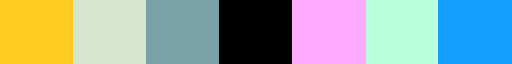

In [31]:
p.update_legend_cmap(update_legend=True)[1]

## Display one object (attribute = 'lithology')

In [32]:
bh = 1
p.boreholes_3d[bh]._components

[Component({'lithology': 'sable', 'pollutant': 'vi'}),
 Component({'lithology': 'argile', 'pollutant': 'vi'}),
 Component({'lithology': 'marne', 'pollutant': 'vr'}),
 Component({'lithology': 'charbon', 'pollutant': 'vs'}),
 Component({'lithology': 'dolomie', 'pollutant': 'vr'})]

/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/striplog.py:1505: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect = mpl.patches.Rectangle(origin,
/home/su530201/.local/share/virtualenvs/GSDMA-tJb-HgI6/lib/python3.8/site-packages/striplog/legend.py:311: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "'". Passing invalid values is deprecated since 3.4 and will become an error two minor releases later.
  rect1 = patches.Rectangle((0, 0),


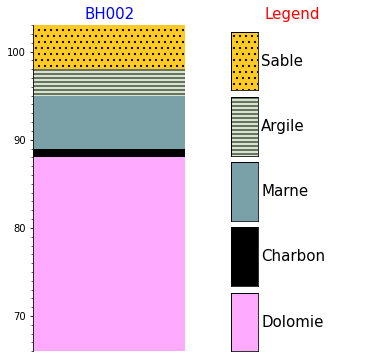

In [33]:
p.boreholes_3d[bh].log_plot()

In [34]:
bh=1
p.boreholes_3d[bh].plot3d(show_legend=False)#, scalar_bar_args=sargs)

Colormap computing ...
{1.4: 'sable', 2.2: 'argile', 3.0: 'marne', 3.8000000000000003: 'charbon', 4.6: 'dolomie'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Plot with another attribute

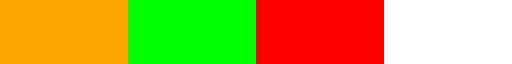

In [35]:
p.update_legend_cmap(repr_attribute='pollutant')[1] #legend=lithology_memoris, update_legend=False)[0]

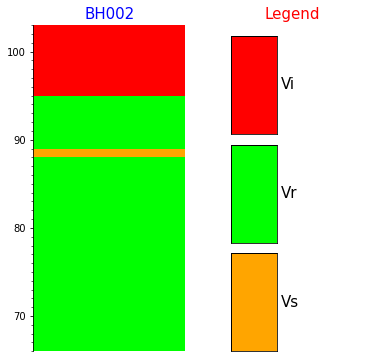

In [36]:
p.boreholes_3d[bh].log_plot(repr_attribute='pollutant', repr_legend=pollutant_memoris)

In [37]:
p.boreholes_3d[bh].plot3d(repr_attribute='pollutant', 
                          repr_legend=pollutant_memoris, 
                          show_legend=True)

Colormap computing ...
{1.4: 'vi', 2.2: 'vr', 3.0: 'vs'}


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Display project boreholes

### Boreholes in 3D using X3D for interaction within the notebook